In [61]:
import sys, os
sys.path.append(os.path.abspath('../'))

In [62]:
from scipy.fft import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils

In [63]:
DATA_FOLDER = '../../output'

In [64]:
def psi(T, f0=6):
    x = np.linspace(-2*np.pi, 2*np.pi, T)
    return (np.pi**-0.25) * np.exp(1j*f0*x - x**2/2)

In [65]:
def wavelet_convolution(tup):
    f=tup[0]
    T=tup[1]
    f_len=np.shape(f)[0]
    f_hat=np.append(f,np.zeros(T))
    h=psi(T)
    h_hat=np.append(h,np.zeros(f_len))

    return ifft(fft(f_hat)*fft(h_hat))[round(T/2):round(T/2)+f_len]

In [66]:
def cwt(f, t0):
    f_len = np.shape(f)[0]
    result = wavelet_convolution([f, t0])
    return result

c:\Users\BML-CBNU\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\BML-CBNU\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\BML-CBNU\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\BML-CBNU\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


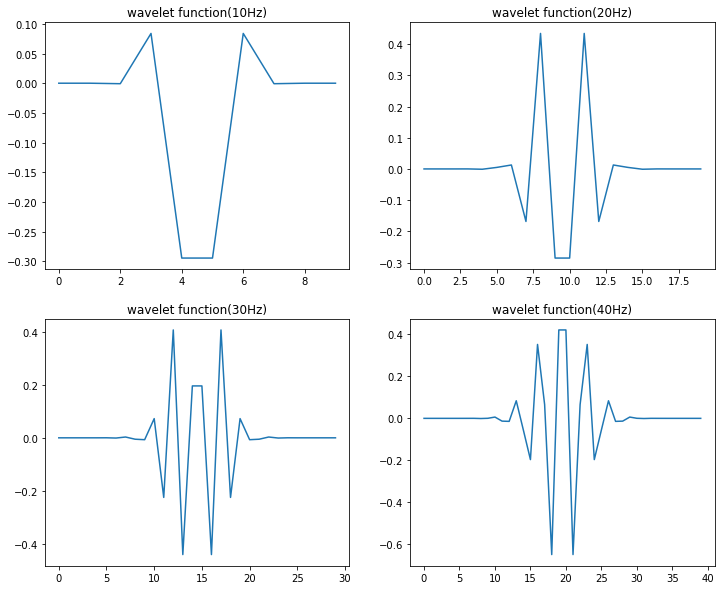

In [67]:
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(psi(10))
ax1.set_title('wavelet function(10Hz)')

ax1 = fig.add_subplot(2, 2, 2)
ax1.plot(psi(20))
ax1.set_title('wavelet function(20Hz)')

ax1 = fig.add_subplot(2, 2, 3)
ax1.plot(psi(30))
ax1.set_title('wavelet function(30Hz)')

ax1 = fig.add_subplot(2, 2, 4)
ax1.plot(psi(40))
ax1.set_title('wavelet function(40Hz)')
plt.show()

<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\BML-CBNU\AppData\Local\Temp\ipykernel_11132\2752295822.py:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is 0:
c:\Users\BML-CBNU\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\BML-CBNU\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\BML-CBNU\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\BML-CBNU\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, 

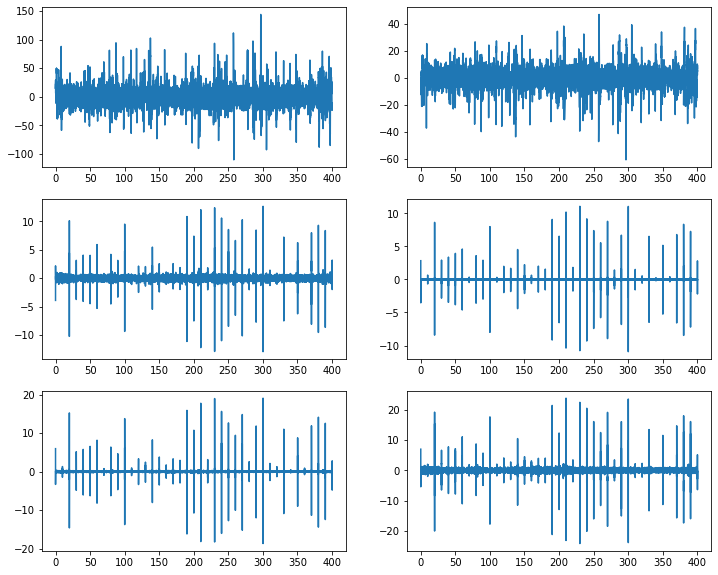

In [68]:
subject_filenames = utils.find_csv_filenames(DATA_FOLDER)

name = subject_filenames[0]
df = utils.load_data(name)

f3 = df.pop("F3").to_numpy()
f3 = f3.reshape(-1,1)
time = np.arange(f3.size) / 100

fig = plt.figure(figsize=(12, 10))

for i in range(6):
    ax = fig.add_subplot(3, 2, i + 1)
    if i is 0:
        ax.plot(time, f3)
    else: 
        ax.plot(time, cwt(f3, 10 * i))
plt.show()

In [69]:
print("Before cwt")
print(pd.DataFrame(f3).shape)
print(pd.DataFrame(f3).head())
print("\n")

print("After cwt")
res = cwt(f3, 20)
print(pd.Series(res).shape)
print(pd.Series(res).head())

Before cwt
(40040, 1)
           0
0  15.275985
1  17.567398
2  20.723024
3  23.137854
4  23.257450


After cwt
(40040,)
0   -3.897753+2.696875j
1    2.164949+0.320745j
2   -0.606696-0.976636j
3   -0.643224+0.058762j
4   -0.438328+0.332159j
dtype: complex128


In [70]:
pd.Series(res).to_csv('wavelet_convolution')

In [ ]:
subject_filenames = utils.find_csv_filenames(DATA_FOLDER) 

name = subject_filenames[0]
df = pd.read_csv(name)
print(df.shape)
        
merged_df = {}
for i in range(df.shape[1]):
    here = pd.Series(cwt(df.iloc[:, i].to_numpy(), 10))
    merged_df[df.index[i]] = here
merged_df = pd.DataFrame(merged_df)

print(merged_df.head())
print(merged_df.shape)